# Módulo 16: Data Massaging

In [1]:
import pandas as pd
import numpy as np
import os

os.chdir('d:/Documentos/DataAnalysis/EBAC/Python')

df = pd.read_csv('Modulo12/netflix_titles.csv', index_col='show_id')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Agarrar rows aleatorias que cambian cada que se corre la celda
df.sample(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s4705,TV Show,All About the Washingtons,NaN,"Joseph Simmons, Justine Simmons, Kiana Ledé, N...",United States,"August 10, 2018",2018,TV-PG,1 Season,TV Comedies,Hip-hop icon MC Joe Speed retires from showbiz...
s7508,Movie,Moonlight,Barry Jenkins,"Trevante Rhodes, André Holland, Janelle Monáe,...",United States,"May 21, 2019",2016,R,111 min,"Dramas, Independent Movies, LGBTQ Movies","In a crime-infested Miami neighborhood, a gay ..."
s5693,TV Show,Lost & Found Music Studios,NaN,"Victoria Baldesarra, Sarah Carmosino, Jordan C...",Canada,"December 3, 2016",2016,TV-G,2 Seasons,"Kids' TV, TV Comedies, TV Dramas",Teen singers-songwriters in an elite music pro...


In [3]:
df.describe().T     # Transposed describe -> solo cambia el formato de salida

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


<AxesSubplot: ylabel='Frequency'>

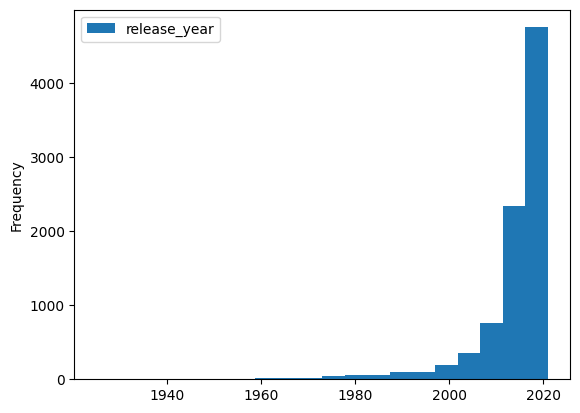

In [4]:
df.plot.hist(bins=20)

In [5]:
# Ver el tipo de dato de cada columa
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

<AxesSubplot: xlabel='country'>

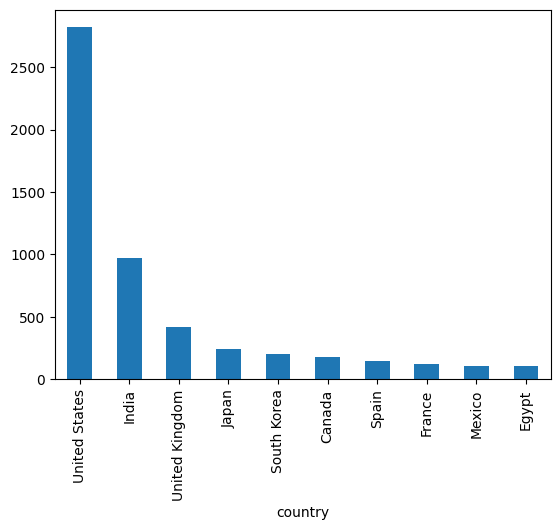

In [6]:
# Top 10 países con más películas en netflix
df.groupby("country").count()['title'].sort_values(ascending=False)[:10].plot.bar()

In [7]:
# Añadir una columna extra - Duración de la película de manera númerica
df['duration_num'] = df['duration']
df['duration_unit'] = ''


In [8]:
# Cambiar todas las columnas tipo object a typo string
stringcols = df.select_dtypes(include='object').columns
df[stringcols] = df[stringcols].fillna('').astype(pd.StringDtype())
df.dtypes

type             string
title            string
director         string
cast             string
country          string
date_added       string
release_year      int64
rating           string
duration         string
listed_in        string
description      string
duration_num     string
duration_unit    string
dtype: object

## Búsqueda de datos

Utilizando where, endswith y replace

In [9]:
# Separar el duration en número y unidad en las dos columnas creadas 
df['duration_unit'] = 'min'

# Se asigna el valor de df['duration_unit'] (min) en donde 'duration_num' termine con 'min', de lo contrario, se pone 'season'
df['duration_unit'] = df['duration_unit'].where(df['duration_num'].str.endswith('min'),'season')

# Aislar el número en la columna 'duration_num'
df['duration_num'] = df['duration_num'].replace({' min':'', 'Season':'', ' Seasons':'', 's':''}, regex=True)       # Revisar REGULAR EXPRESIONS

df.head()

# Por Simplicidad también se podría haber utilizado el .split

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,season
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,season
s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,season
s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,season


In [10]:
# Cambiar el 'duration_num" a valor numérico
df['duration_num'] = pd.to_numeric(df['duration_num'])
df.describe()

# Aqui se puede ver que hay 8804 valores de durtion_num, eso quiere decir que hay 3 valores vacíos

,release_year,duration_num
count,8807.000000,8804.000000
mean,2014.180198,69.846888
std,8.819312,50.814828
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [11]:
df.loc[df['duration_num'].isnull()]

# Aqui se puede ver que los tres valores con duration_num vacío tienen un error: el rating debería estar vacío y el duration con el valor que ahorita hay en el rating. Vamos a arreglarlo con el método .at()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
show_id,,,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,,Movies,"Louis C.K. muses on religion, eternal love, gi...",NaN,season
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,,Movies,Emmy-winning comedy writer Louis C.K. brings h...,NaN,season
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,,Movies,The comic puts his trademark hilarious/thought...,NaN,season


In [12]:
# Método .at()
# Aquí se puede editar el valor de un campo en específico a partir del index de la línea y el nombre de columna

df.at['s5542', 'duration_unit'] = 'min'
df.at['s5542', 'duration_unit'] = 'min'
df.at['s5542', 'duration_unit'] = 'min'

df.at['s5542', 'duration_num'] = 74
df.at['s5795', 'duration_num'] = 84
df.at['s5814', 'duration_num'] = 66

df.at['s5542', 'duration'] = '74 min'
df.at['s5795', 'duration'] = '84 min'
df.at['s5814', 'duration'] = '66 min'

# Aqui se ve que se corrigieron puesto que ya no aparece ningún campo con duration_num nulo
df.loc[df['duration_num'].isnull()]


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
show_id,,,,,,,,,,,,,


<AxesSubplot: ylabel='Frequency'>

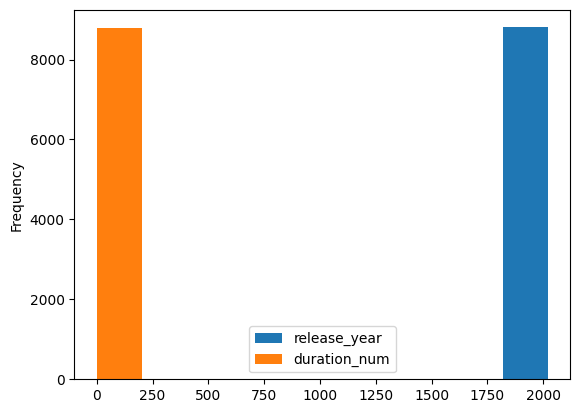

In [13]:
df.plot.hist()

### Filtro de Datos

In [14]:
# Filtrar películas de más de dos horas de duración
df[['title', 'country', 'release_year', 'duration']].loc[df['duration_num'] > 120]

,title,country,release_year,duration
show_id,,,,
s8,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min
s13,Je Suis Karl,"Germany, Czech Republic",2021,127 min
s23,Avvai Shanmughi,,1996,161 min
s25,Jeans,India,1998,166 min
s27,Minsara Kanavu,,1997,147 min
...,...,...,...,...
s8773,Yamla Pagla Deewana 2,India,2013,147 min
s8774,Yanda Kartavya Aahe,India,2006,151 min
s8789,You Carry Me,"Croatia, Slovenia, Serbia, Montenegro",2015,157 min


In [15]:
# Filtrar películas con año de publicación de 1989

df[['title', 'country', 'release_year', 'duration']].loc[df['release_year'] == 1989]

,title,country,release_year,duration
show_id,,,,
s140,Do the Right Thing,United States,1989,120 min
s604,The Karate Kid Part III,United States,1989,112 min
s929,Best of the Best,United States,1989,97 min
s1762,Little Monsters,United States,1989,102 min
s2367,Alexandria: Again and Forever,"France, Egypt",1989,109 min
s4234,Bill Hicks: Sane Man,United States,1989,81 min
s4555,Parrot Sketch Not Included: Twenty Years of Mo...,United Kingdom,1989,72 min
s5305,Mujrim,India,1989,163 min
s5949,The Ryan White Story,United States,1989,94 min


In [16]:
# Multiples condiciones

df[['title', 'country', 'release_year', 'duration']].loc[(df['release_year'] == 1989) & (df['country'] == 'India')]         # Condición 'and' con &
df[['title', 'country', 'release_year', 'duration']].loc[(df['release_year'] == 1989) | (df['country'] == 'India')]         # Condición 'or' con | (pipe)


,title,country,release_year,duration
show_id,,,,
s5,Kota Factory,India,2021,2 Seasons
s25,Jeans,India,1998,166 min
s40,Chhota Bheem,India,2021,3 Seasons
s51,Dharmakshetra,India,2014,1 Season
s67,Raja Rasoi Aur Anya Kahaniyan,India,2014,1 Season
...,...,...,...,...
s8774,Yanda Kartavya Aahe,India,2006,151 min
s8776,Yeh Meri Family,India,2018,1 Season
s8799,Zed Plus,India,2014,131 min


<AxesSubplot: ylabel='Frequency'>

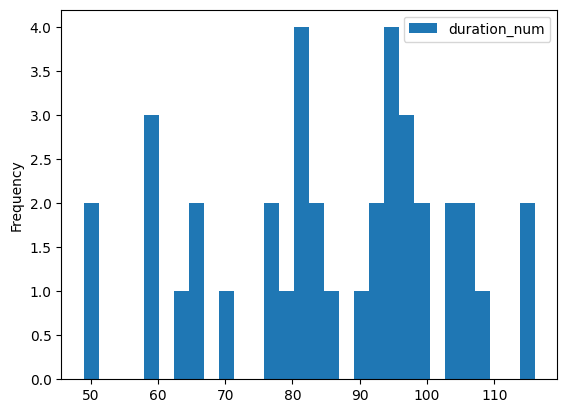

In [17]:
# plot

df[['title', 'country', 'duration_num']].loc[(df['country'] == 'Argentina') & (df['type'] == 'Movie')].plot.hist(bins=30)

In [18]:
# sort values
df[['title', 'country', 'release_year', 'duration']].sort_values(by='release_year')

,title,country,release_year,duration
show_id,,,,
s4251,Pioneers: First Women Filmmakers*,,1925,1 Season
s7791,Prelude to War,United States,1942,52 min
s8206,The Battle of Midway,United States,1942,18 min
s8661,Undercover: How to Operate Behind Enemy Lines,United States,1943,61 min
s8740,Why We Fight: The Battle of Russia,United States,1943,82 min
...,...,...,...,...
s863,Special,United States,2021,2 Seasons
s862,Little Singham Future mein Satakli,,2021,47 min
s858,The Neighbor,Spain,2021,2 Seasons


In [19]:
# group by -> genera un nuevo dataframe
df_temp = df.groupby('release_year').size().rename('movies').reset_index()
df_temp

,release_year,movies
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


In [20]:
df_temp['movies'].max()

1147

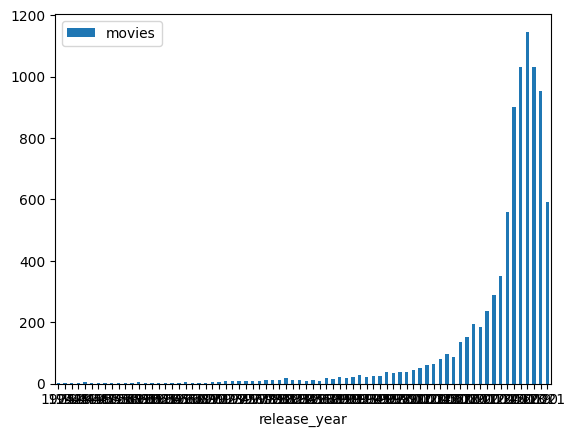

In [21]:
import matplotlib.pyplot as plt
ax = df_temp.plot.bar(x='release_year', y='movies', rot=0)
plt.show()

## Inserción, Eliminación y Edición de un DataFrame

In [22]:
clase = [('Jorge', 22, 'MX'),
            ('Anita', 31, 'MX'),
            ('Raul', 16, 'BR'),
            ('Simon', 41, 'BR'),
            ('Diego', 33, 'PA'),
            ('Jorge', 35, 'PA'),
            ('Almendra', 35, 'COL'),
            ('Mary', 35, 'COL'),
            ('Peter', 35, 'EC'),
            ('Andrés', 35, 'EC')
        ]

df_clase = pd.DataFrame(clase, columns=['Nombre', 'Edad', 'País'])
df_clase.head()

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA


In [23]:
# Inserción de datos
df_clase = df_clase.append({'Nombre': 'Isabel', 'Edad': 35, 'País': 'PER'}, ignore_index=True)      # Importante volver a asignar el dataframe
df_clase

C:\Users\CARLOS DEL VALLE\AppData\Local\Temp\ipykernel_12800\4178209204.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clase = df_clase.append({'Nombre': 'Isabel', 'Edad': 35, 'País': 'PER'}, ignore_index=True)      # Importante volver a asignar el dataframe


,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [24]:
# Eliminación de datos
df_clase = df_clase.drop(df_clase.index[10])        # Importante volver a asignar el dataframe
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [25]:
df_clase = df_clase.drop(df_clase.index[[8,9]])
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL


In [26]:
# Modificación de datos con 'at'
df_clase.at[3,'Nombre'] = 'José'
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,José,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL


In [27]:
# Para registros a múltiples filas y/o columnas
df_clase.loc[1:2, ['Edad', 'País']] = [32, 'Arg']
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,32,Arg
2,Raul,32,Arg
3,José,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL


In [28]:
# Reemplazar valores '.replace()'
df_clase.replace('PA', 'PAN', inplace=True)
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,32,Arg
2,Raul,32,Arg
3,José,41,BR
4,Diego,33,PAN
5,Jorge,35,PAN
6,Almendra,35,COL
7,Mary,35,COL


In [29]:
# Bonus con Seaborn
import seaborn as sns
sns.set()
%matplotlib inline

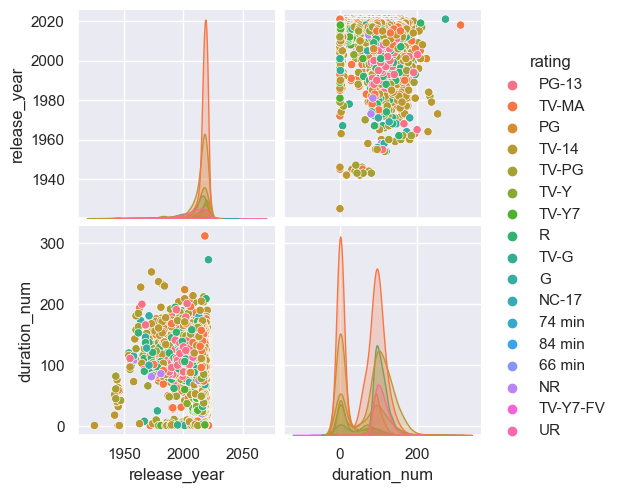

In [30]:
sns.pairplot(df, hue='rating')

In [32]:
df.to_csv('Modulo16/netflix_titles_2.csv')